# Slope Constriants in Dynamic Time Wrapping (DTW) Algorithm

## Load libraries

In [1]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
import dtw as DTW_module

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Setup

### Step Pattern

e:\Programs\miniconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

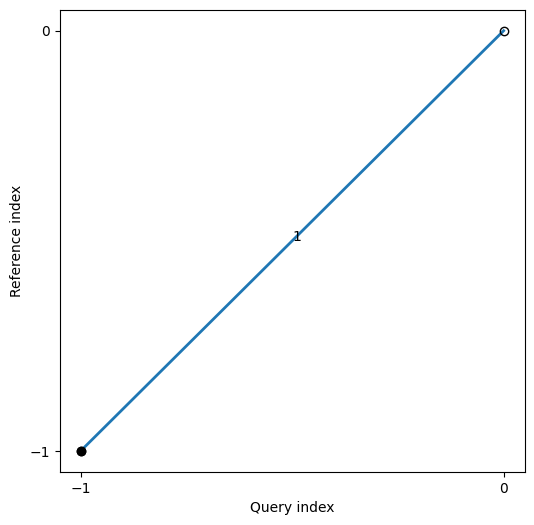

In [3]:
DTW_module.rigid.plot()

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

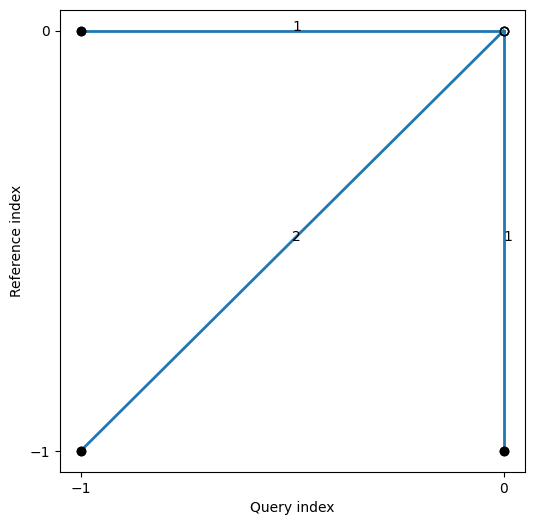

In [4]:
DTW_module.symmetricP0.plot()

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

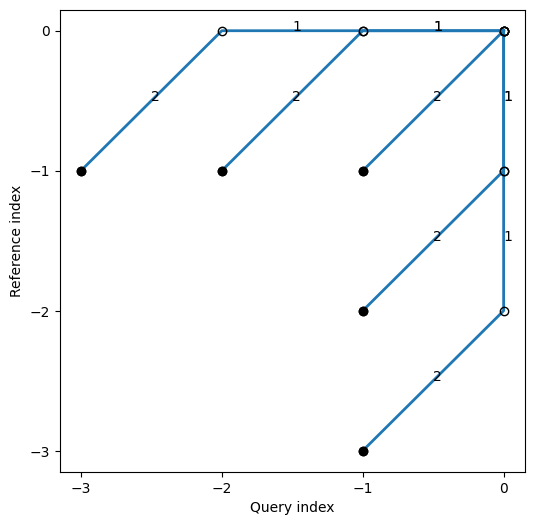

In [5]:
DTW_module.symmetricP05.plot()

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

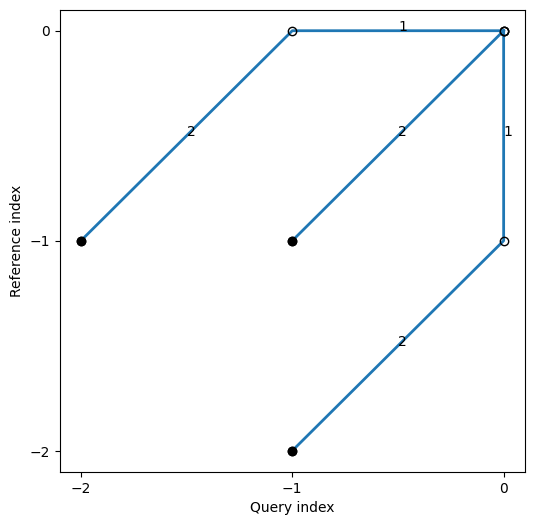

In [6]:
DTW_module.symmetricP1.plot()

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

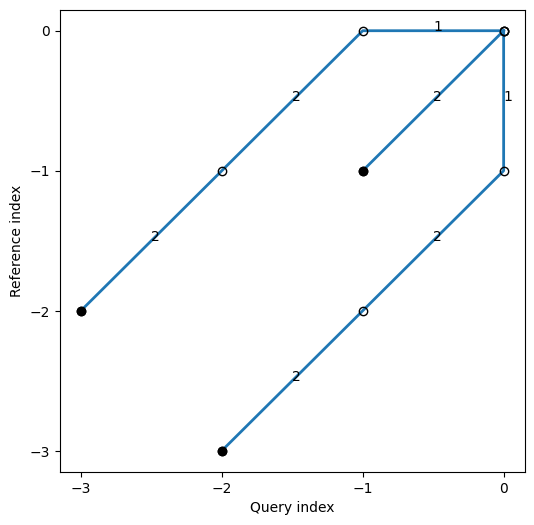

In [7]:
DTW_module.symmetricP2.plot()

In [8]:
# source code from dtw-python libraries
# reference: https://github.com/DynamicTimeWarping/dtw-python/blob/master/dtw/stepPattern.py

def _error(s):
    raise ValueError(s)

def _c(*v):
    va = np.array([*v])
    if len(va) % 4 != 0:
        _error("Internal error in _c constructor")
    va = va.reshape((-1, 4))
    return (va)

In [9]:
symmetricP3 = DTW_module.StepPattern(_c(
    1, 3, 4, -1,
    1, 2, 3, 2,
    1, 1, 2, 2,
    1, 0, 1, 2,
    1, 0, 0, 1,
    2, 1, 1, -1,
    2, 0, 0, 2,
    3, 4, 3, -1,
    3, 3, 2, 2,
    3, 2, 1, 2,
    3, 1, 0, 2,
    3, 0, 0, 1
), "N+M");

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

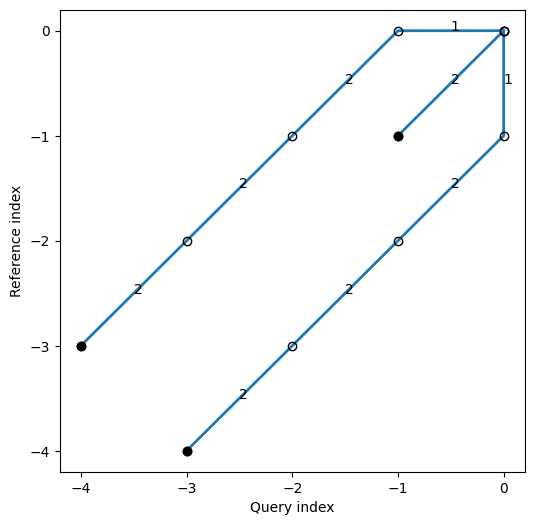

In [10]:
symmetricP3.plot()

<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

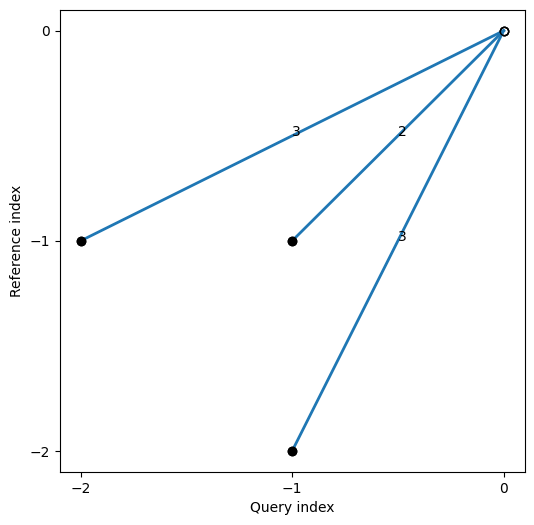

In [11]:
DTW_module.rabinerJuangStepPattern(3,"d").plot()

### load dataset and define lambda function

In [12]:
seed = 42
np.random.seed(seed)

In [13]:
def load_dataset(file_path, train=False):
    data = np.loadtxt(file_path)
    if train:
        np.random.shuffle(data)
    X = data[:,1:]
    y = data[:, 0].astype('int')
    return X, y

In [14]:
def plot_random_data(data, labels, sample_size=5, height=2):
    rints = np.random.choice(a=range(0, len(data)), size=sample_size, replace=False)
    fig, axs = plt.subplots(sample_size, 1)
    fig.set_figheight(height*sample_size)
    
    for j in range(sample_size):
        axs[j].plot(data[rints[j]])
        axs[j].set_title(f"data index={rints[j]} ({labels[rints[j]]})")
    plt.tight_layout(pad=0.4)
    plt.show()


In [15]:
def linear_time_normalize(a, b):
    assert a.size == b.size
    n = a.size
    dist_sum = 0
    for i in range(n):
        dist_sum += abs(a[i] - b[i])
    return dist_sum / n
        

In [16]:
## defining each type of DTW
r = 8

dtw_rabinerIII = lambda a, b: DTW_module.dtw(a, b, step_pattern=DTW_module.rabinerJuangStepPattern(3,"d"), window_type="sakoechiba", distance_only=True, window_args={"window_size": r}).normalizedDistance

dtw_symmetricP0 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP05 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP05, distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP1 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP1, distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP2 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP2, distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP3 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=symmetricP3, distance_only=True, window_args={"window_size": r}).normalizedDistance


## ECG200 Dataset

In [17]:
X_train, y_train = load_dataset('data/ECG200_TRAIN', train=True) 
X_test, y_test = load_dataset('data/ECG200_TEST')

In [18]:
print(X_train.shape)
print(X_test.shape)

(100, 96)
(100, 96)


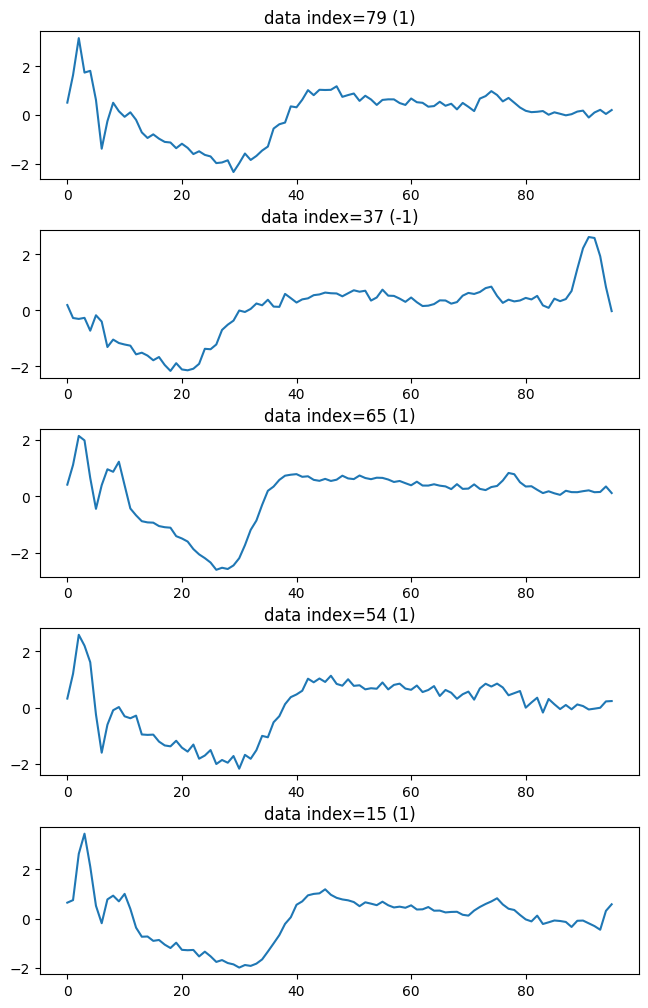

In [19]:
plot_random_data(X_train, y_train)

### training

In [20]:
baseline = KNeighborsClassifier(metric=linear_time_normalize, n_neighbors=1, n_jobs=-1) # Pinf
ribner_type3 = KNeighborsClassifier(metric=dtw_rabinerIII, n_neighbors=1, n_jobs=-1)

In [21]:
baseline.fit(X_train, y_train)
ribner_type3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C602DD0>,
                     n_jobs=-1, n_neighbors=1)

In [22]:
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)
clf_p3 = KNeighborsClassifier(metric=dtw_symmetricP3, n_neighbors=1, n_jobs=-1)

In [23]:
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)
clf_p3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C603400>,
                     n_jobs=-1, n_neighbors=1)

In [24]:
y_pred_baseline = baseline.predict(X_test)
y_pred_rabiner = ribner_type3.predict(X_test)

In [25]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)
y_pred_p3 = clf_p3.predict(X_test)

In [26]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
rabiner_score = accuracy_score(y_test, y_pred_rabiner)

In [27]:
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)
p3_score = accuracy_score(y_test, y_pred_p3)

### accuracy comparision

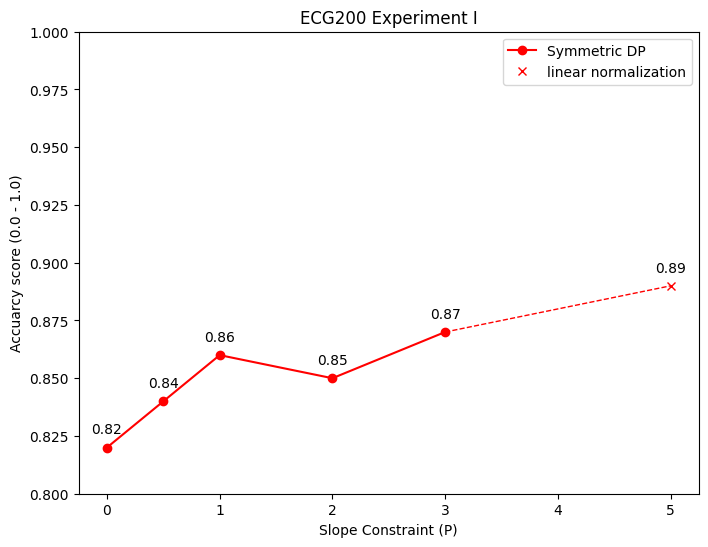

In [28]:
# plot the accuracy score for each p
xs = [0, 0.5, 1, 2, 3]
ys = [p0_score, p05_score, p1_score, p2_score, p3_score]

fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('ECG200 Experiment I')

ax.plot(xs, ys, 'o-r', label="Symmetric DP")
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

line, = plt.plot([3, 5], [p3_score, baseline_score], '--')
plt.setp(line, color='r', linewidth=1)

ax.plot(5, baseline_score, 'x', color='r', label='linear normalization')
plt.annotate("{:.2f}".format(baseline_score),
                (5,baseline_score),
                textcoords="offset points",
                xytext=(0,10),
                ha='center') 
ax.legend()

plt.ylim(0.8, 1.0)
plt.show()

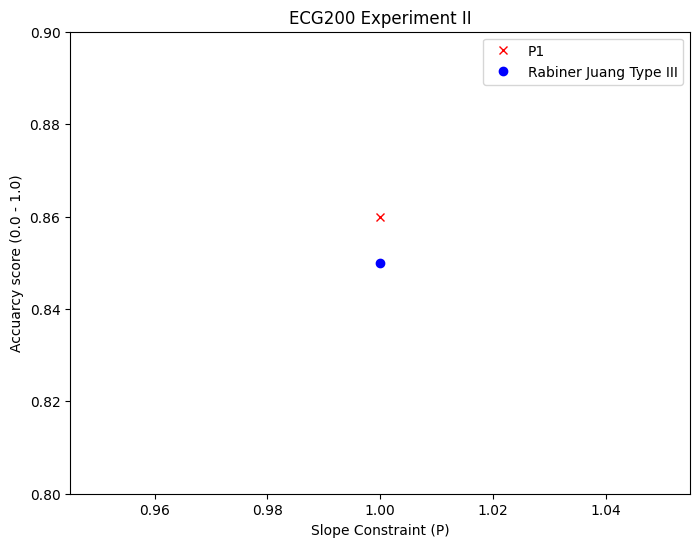

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('ECG200 Experiment II')

plt.ylim(0.8, 0.9)  
ax.plot(1, p1_score, 'x', color='r', label='P1')
ax.plot(1, rabiner_score, 'o', color='b', label='Rabiner Juang Type III')
ax.legend()

plt.show()

## Gun_Point Dataset

In [30]:
X_train, y_train = load_dataset('data/Gun_Point_TRAIN', train=True) 
X_test, y_test = load_dataset('data/Gun_Point_TEST')

In [31]:
print(X_train.shape)
print(X_test.shape)

(50, 150)
(150, 150)


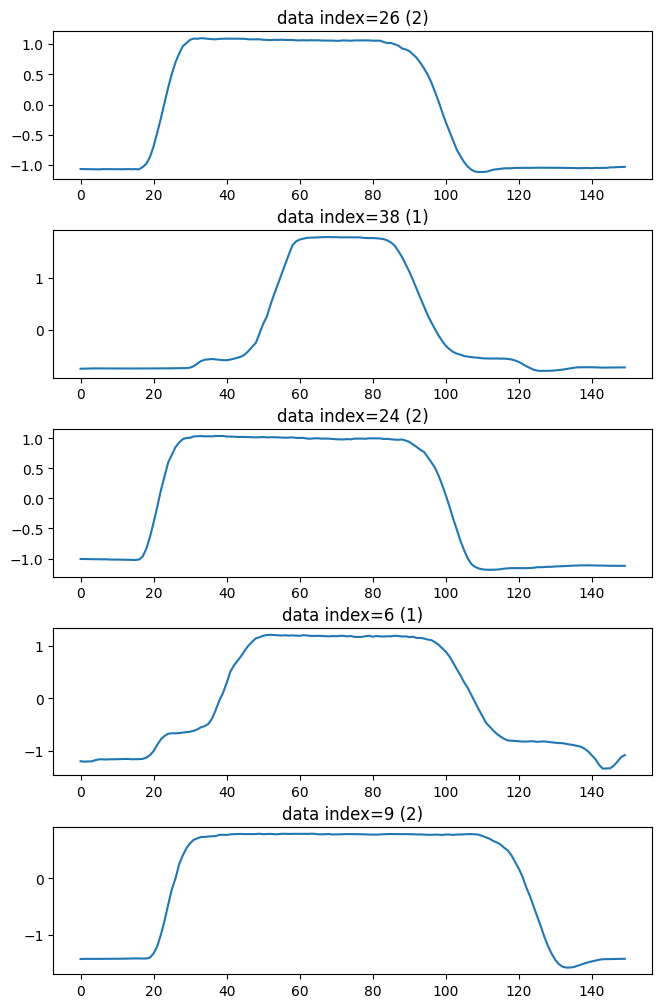

In [32]:
plot_random_data(X_train, y_train)

### training

In [33]:
baseline = KNeighborsClassifier(metric=linear_time_normalize, n_neighbors=1, n_jobs=-1) # Pinf
ribner_type3 = KNeighborsClassifier(metric=dtw_rabinerIII, n_neighbors=1, n_jobs=-1)

In [34]:
baseline.fit(X_train, y_train)
ribner_type3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C602DD0>,
                     n_jobs=-1, n_neighbors=1)

In [35]:
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)
clf_p3 = KNeighborsClassifier(metric=dtw_symmetricP3, n_neighbors=1, n_jobs=-1)

In [36]:
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)
clf_p3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C603400>,
                     n_jobs=-1, n_neighbors=1)

In [37]:
y_pred_baseline = baseline.predict(X_test)
y_pred_rabiner = ribner_type3.predict(X_test)

In [38]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)
y_pred_p3 = clf_p3.predict(X_test)

In [39]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
rabiner_score = accuracy_score(y_test, y_pred_rabiner)

In [40]:
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)
p3_score = accuracy_score(y_test, y_pred_p3)

### accuracy comparision

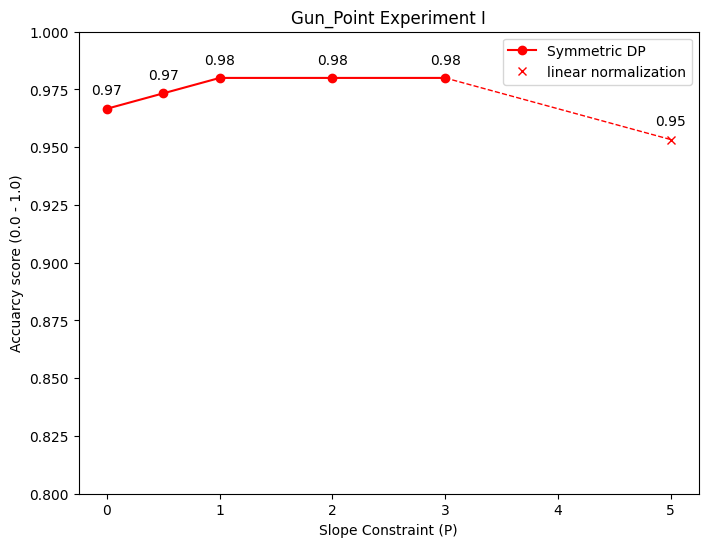

In [41]:
# plot the accuracy score for each p
xs = [0, 0.5, 1, 2, 3]
ys = [p0_score, p05_score, p1_score, p2_score, p3_score]

fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('Gun_Point Experiment I')

ax.plot(xs, ys, 'o-r', label="Symmetric DP")
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

line, = plt.plot([3, 5], [p3_score, baseline_score], '--')
plt.setp(line, color='r', linewidth=1)

ax.plot(5, baseline_score, 'x', color='r', label='linear normalization')
plt.annotate("{:.2f}".format(baseline_score),
                (5,baseline_score),
                textcoords="offset points",
                xytext=(0,10),
                ha='center') 
ax.legend()

plt.ylim(0.8, 1.0)
plt.show()

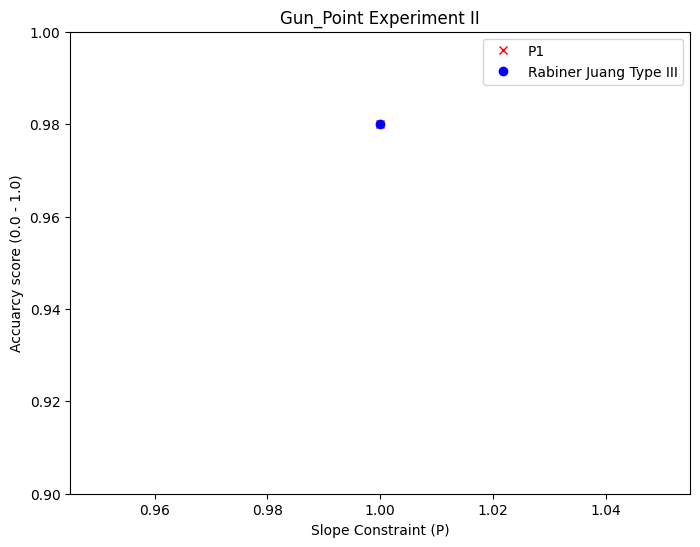

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('Gun_Point Experiment II')

plt.ylim(0.9, 1.0)  
ax.plot(1, p1_score, 'x', color='r', label='P1')
ax.plot(1, rabiner_score, 'o', color='b', label='Rabiner Juang Type III')
ax.legend()

plt.show()

## Beef Dataset

In [43]:
X_train, y_train = load_dataset('data/Beef_TRAIN', train=True) 
X_test, y_test = load_dataset('data/Beef_TEST')

In [44]:
print(X_train.shape)
print(X_test.shape)

(30, 470)
(30, 470)


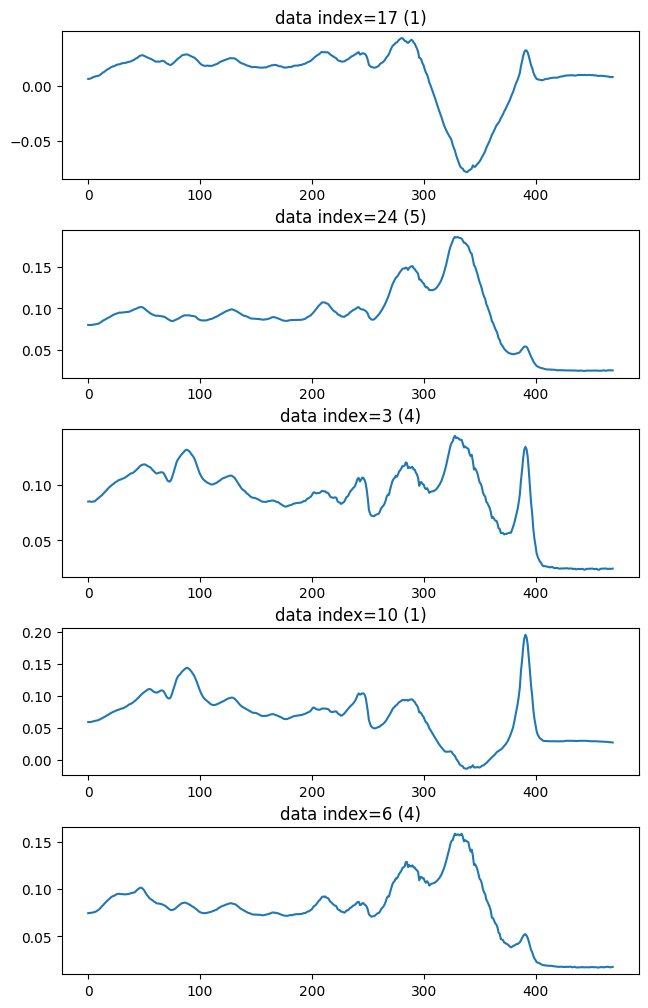

In [45]:
plot_random_data(X_train, y_train)

### training

In [46]:
baseline = KNeighborsClassifier(metric=linear_time_normalize, n_neighbors=1, n_jobs=-1) # Pinf
ribner_type3 = KNeighborsClassifier(metric=dtw_rabinerIII, n_neighbors=1, n_jobs=-1)

In [47]:
baseline.fit(X_train, y_train)
ribner_type3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C602DD0>,
                     n_jobs=-1, n_neighbors=1)

In [48]:
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)
clf_p3 = KNeighborsClassifier(metric=dtw_symmetricP3, n_neighbors=1, n_jobs=-1)

In [49]:
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)
clf_p3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C603400>,
                     n_jobs=-1, n_neighbors=1)

In [50]:
y_pred_baseline = baseline.predict(X_test)
y_pred_rabiner = ribner_type3.predict(X_test)

In [51]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)
y_pred_p3 = clf_p3.predict(X_test)

In [52]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
rabiner_score = accuracy_score(y_test, y_pred_rabiner)

In [53]:
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)
p3_score = accuracy_score(y_test, y_pred_p3)

### accuracy comparision

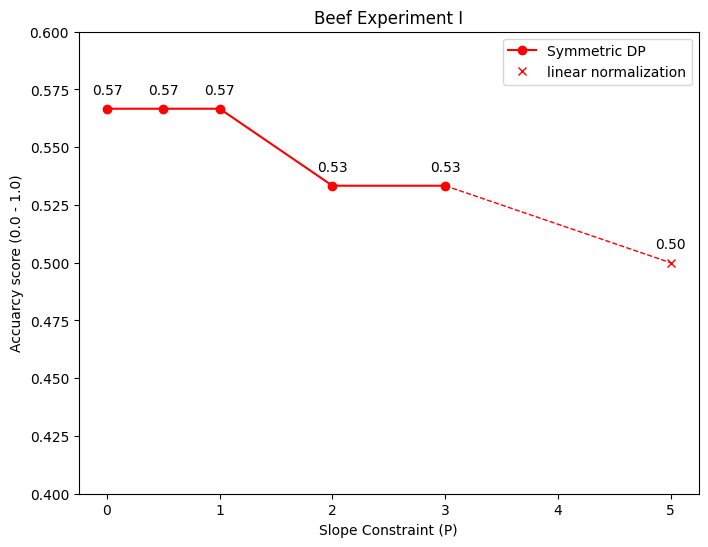

In [54]:
# plot the accuracy score for each p
xs = [0, 0.5, 1, 2, 3]
ys = [p0_score, p05_score, p1_score, p2_score, p3_score]

fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('Beef Experiment I')

ax.plot(xs, ys, 'o-r', label="Symmetric DP")
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

line, = plt.plot([3, 5], [p3_score, baseline_score], '--')
plt.setp(line, color='r', linewidth=1)

ax.plot(5, baseline_score, 'x', color='r', label='linear normalization')
plt.annotate("{:.2f}".format(baseline_score),
                (5,baseline_score),
                textcoords="offset points",
                xytext=(0,10),
                ha='center') 
ax.legend()

plt.ylim(0.4, 0.6)
plt.show()

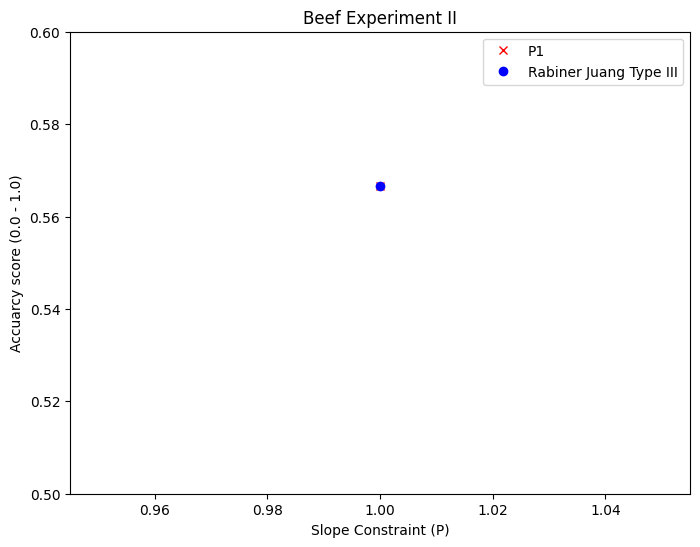

In [55]:
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('Beef Experiment II')

plt.ylim(0.5, 0.6)  
ax.plot(1, p1_score, 'x', color='r', label='P1')
ax.plot(1, rabiner_score, 'o', color='b', label='Rabiner Juang Type III')
ax.legend()

plt.show()

## 50words Dataset

In [56]:
X_train, y_train = load_dataset('data/50words_TRAIN', train=True) 
X_test, y_test = load_dataset('data/50words_TEST')

In [57]:
print(X_train.shape)
print(X_test.shape)

(450, 270)
(455, 270)


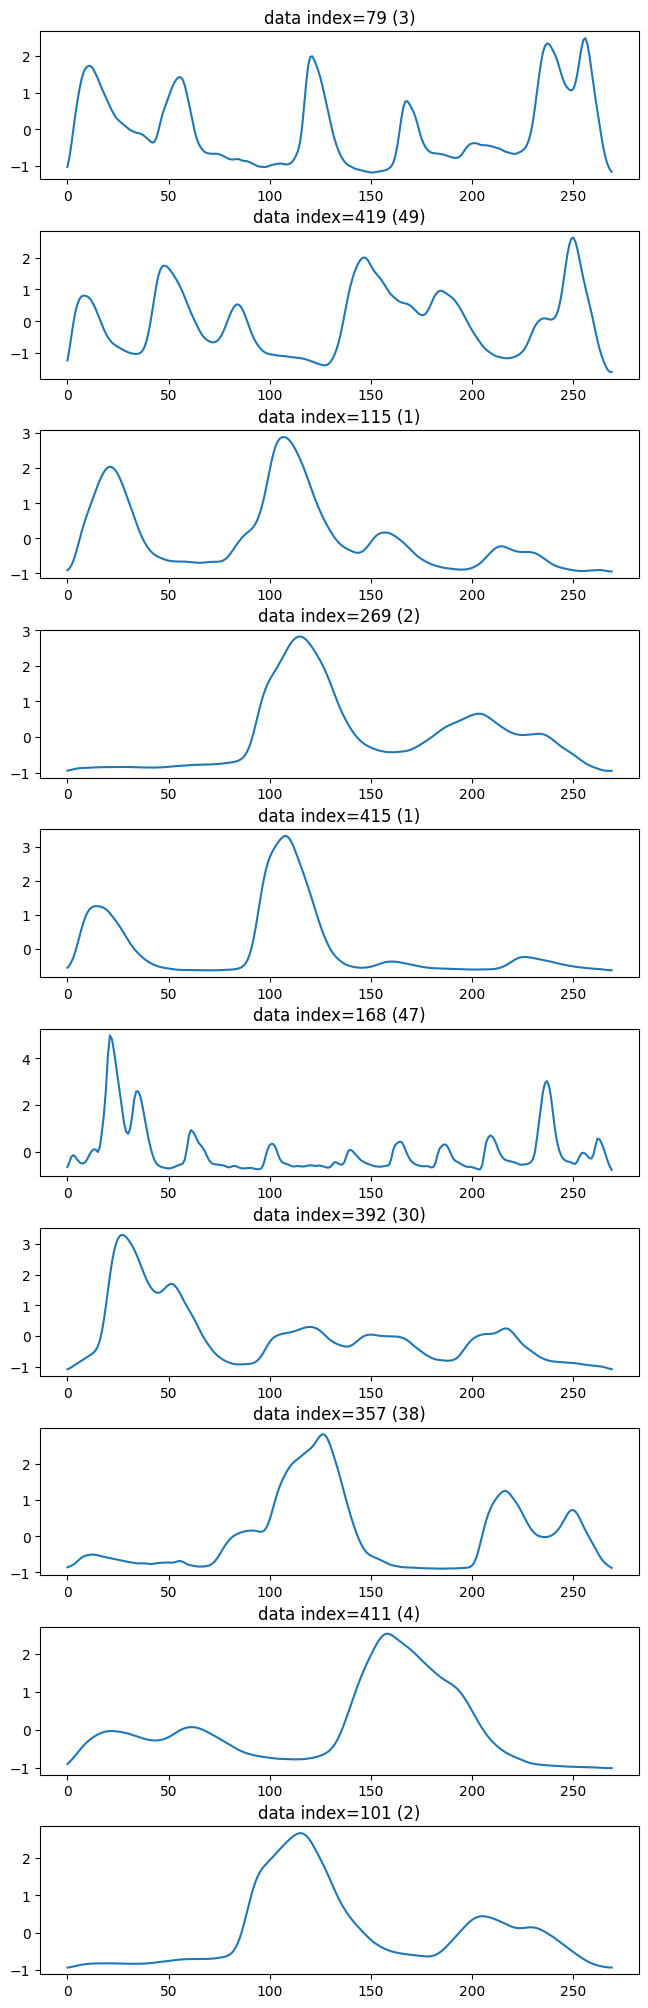

In [58]:
plot_random_data(X_train, y_train, sample_size=10)

### training

In [59]:
baseline = KNeighborsClassifier(metric=linear_time_normalize, n_neighbors=1, n_jobs=-1) # Pinf
ribner_type3 = KNeighborsClassifier(metric=dtw_rabinerIII, n_neighbors=1, n_jobs=-1)

In [60]:
baseline.fit(X_train, y_train)
ribner_type3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C602DD0>,
                     n_jobs=-1, n_neighbors=1)

In [61]:
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)
clf_p3 = KNeighborsClassifier(metric=dtw_symmetricP3, n_neighbors=1, n_jobs=-1)

In [62]:
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)
clf_p3.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x0000010D7C603400>,
                     n_jobs=-1, n_neighbors=1)

In [63]:
y_pred_baseline = baseline.predict(X_test)
y_pred_rabiner = ribner_type3.predict(X_test)

In [64]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)
y_pred_p3 = clf_p3.predict(X_test)

In [65]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
rabiner_score = accuracy_score(y_test, y_pred_rabiner)

In [66]:
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)
p3_score = accuracy_score(y_test, y_pred_p3)

### accuracy comparsion

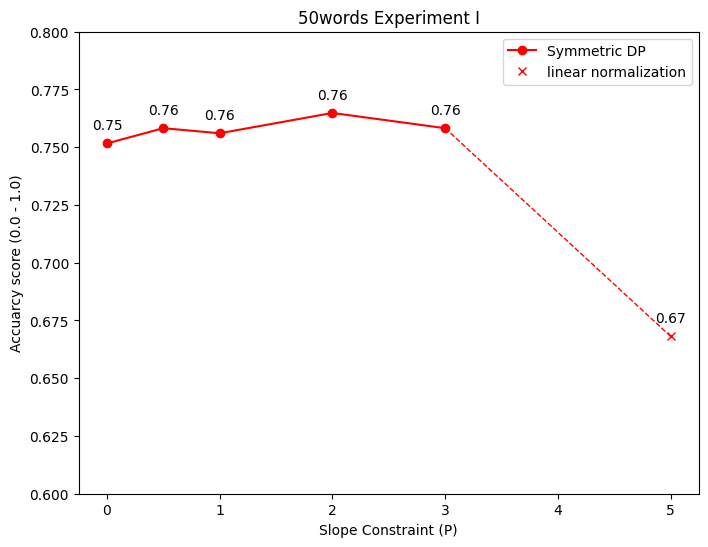

In [67]:
# plot the accuracy score for each p
xs = [0, 0.5, 1, 2, 3]
ys = [p0_score, p05_score, p1_score, p2_score, p3_score]

fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('50words Experiment I')

ax.plot(xs, ys, 'o-r', label="Symmetric DP")
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

line, = plt.plot([3, 5], [p3_score, baseline_score], '--')
plt.setp(line, color='r', linewidth=1)

ax.plot(5, baseline_score, 'x', color='r', label='linear normalization')
plt.annotate("{:.2f}".format(baseline_score),
                (5,baseline_score),
                textcoords="offset points",
                xytext=(0,10),
                ha='center') 
ax.legend()

plt.ylim(0.6, 0.8)
plt.show()

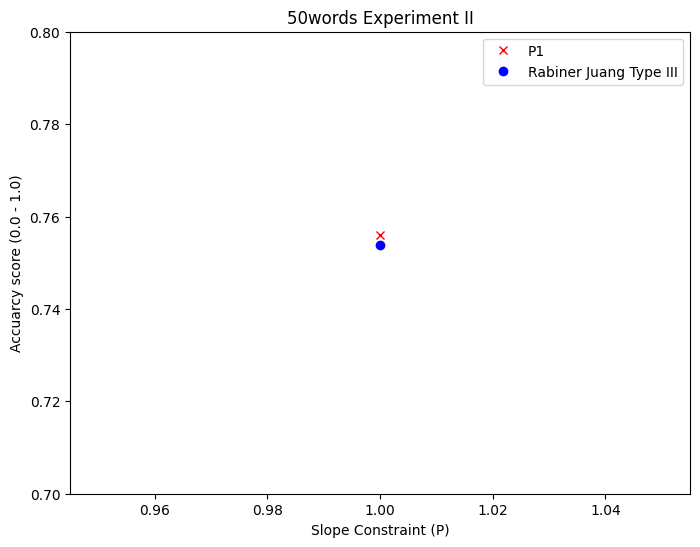

In [68]:
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel('Slope Constraint (P)')
plt.ylabel('Accuarcy score (0.0 - 1.0)')
plt.title('50words Experiment II')

plt.ylim(0.7, 0.8)  
ax.plot(1, p1_score, 'x', color='r', label='P1')
ax.plot(1, rabiner_score, 'o', color='b', label='Rabiner Juang Type III')
ax.legend()

plt.show()